### 1. 데이터 수집하기
##### http://data.kma.go.kr - [서울의 연간 기온 데이터 다운로드]

### 2. 데이터 읽어오기

In [3]:
import pandas as pd
df = pd.read_csv('seoul_temp.csv', encoding = 'cp949', header = 0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
년       112 non-null int64
지점      112 non-null int64
평균기온    107 non-null float64
최저기온    110 non-null float64
최고기온    110 non-null float64
dtypes: float64(3), int64(2)
memory usage: 4.5 KB


### 3. 데이터 시각화하기

In [7]:
df = df.fillna(method='bfill')

In [ ]:
year = df['년']
temp = df['평균기온']
mx = df['최고기온']
mn = df['최저기온']

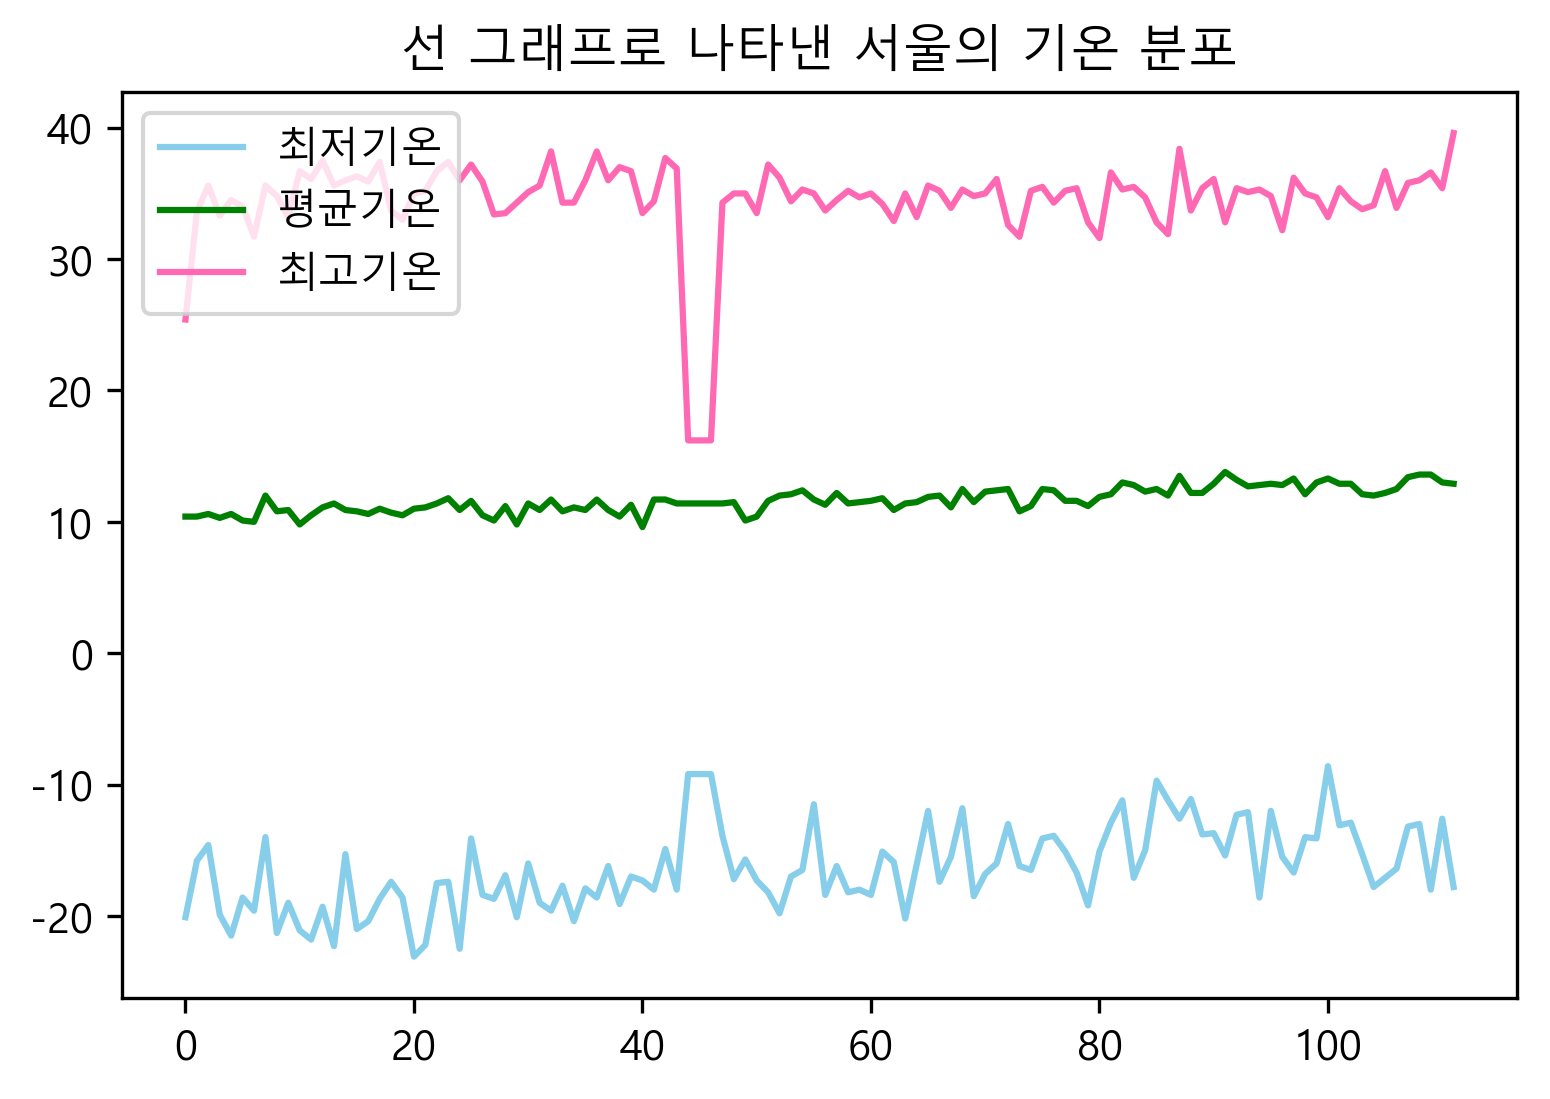

In [26]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('선 그래프로 나타낸 서울의 기온 분포')
plt.plot(mn, color = 'skyblue',label = '최저기온')
plt.plot(temp, color = 'green',label = '평균기온')
plt.plot(mx, color = 'hotpink',label = '최고기온')
plt.legend()
plt.show()

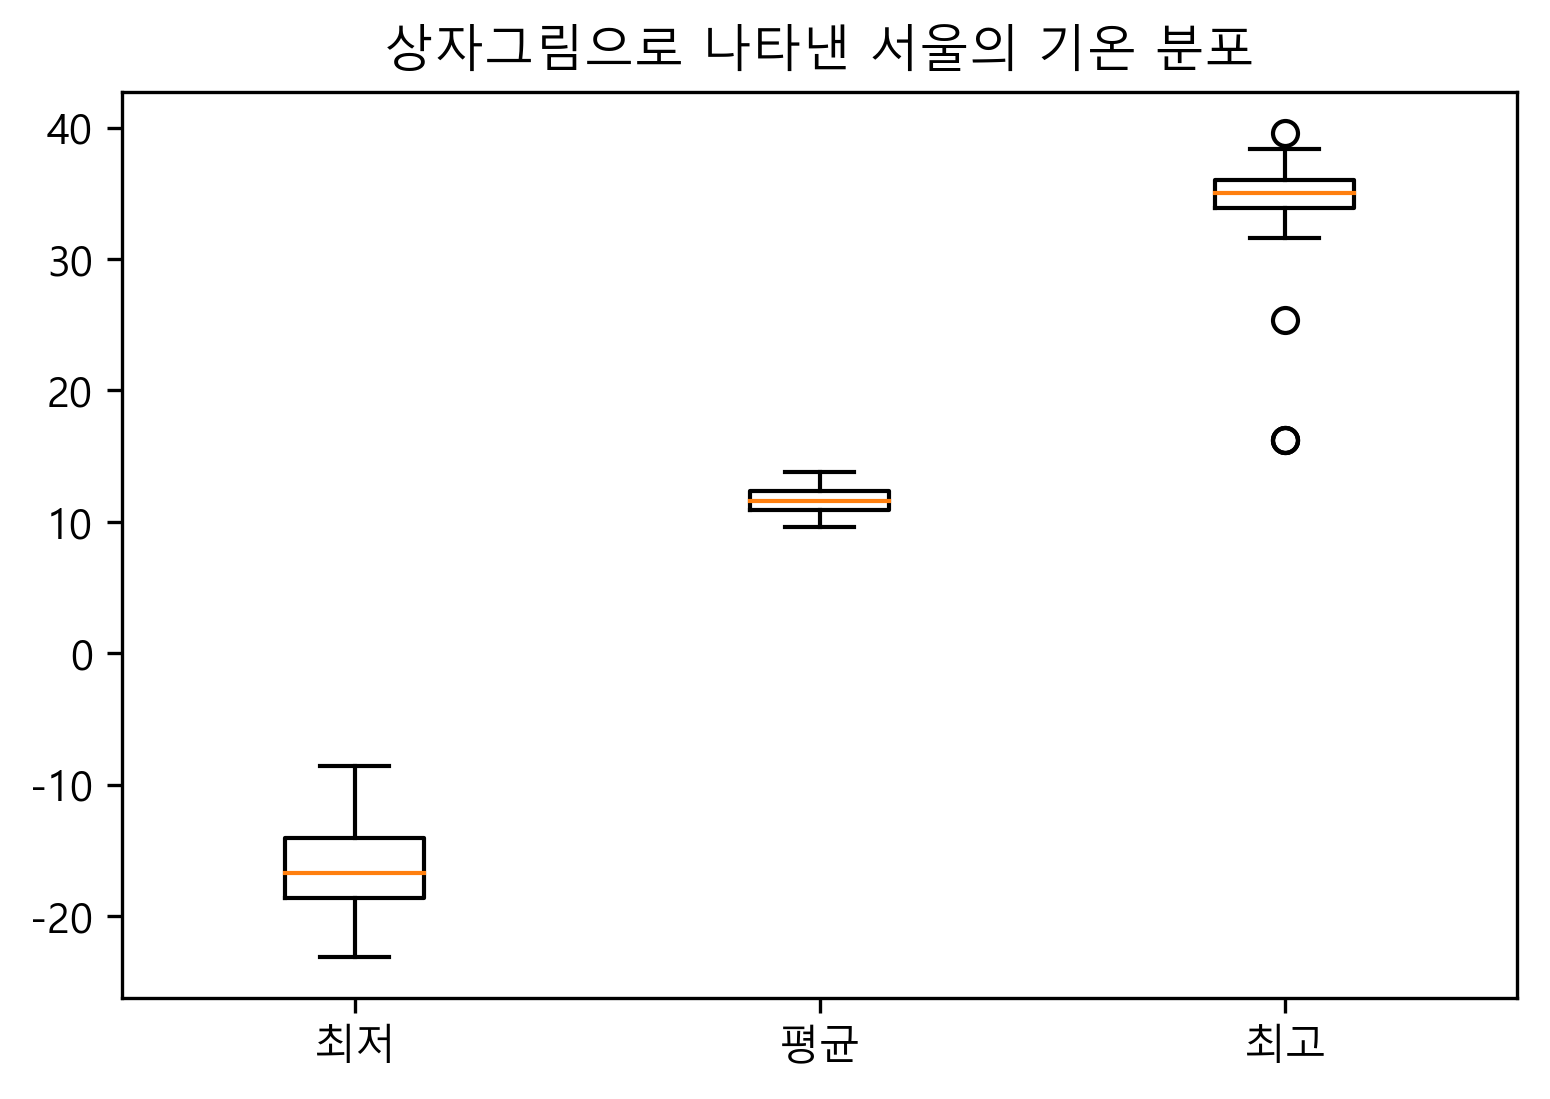

In [23]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.rcParams['axes.unicode_minus'] = False
plt.title('상자그림으로 나타낸 서울의 기온 분포')
plt.boxplot([mn, temp, mx])
plt.xticks(range(1,4), ['최저','평균','최고'])
plt.show()

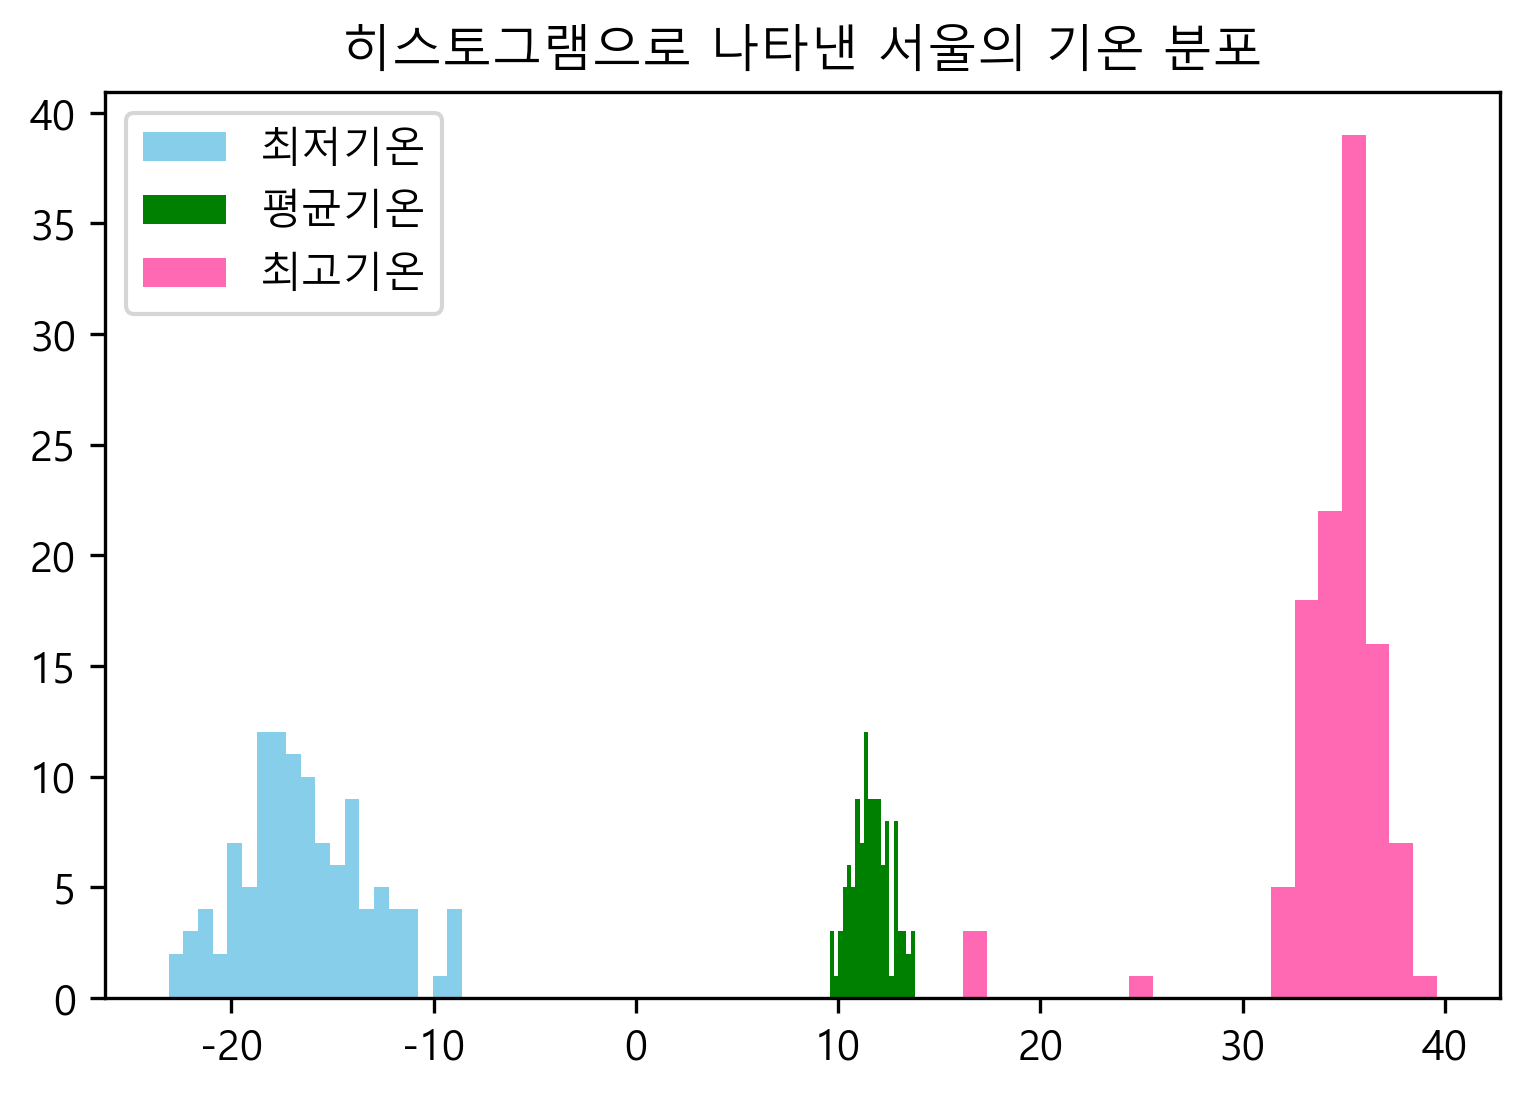

In [27]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('히스토그램으로 나타낸 서울의 기온 분포')
plt.hist(mn, color = 'skyblue', bins = 20, label = '최저기온')
plt.hist(temp, color = 'green', bins = 20, label = '평균기온')
plt.hist(mx, color = 'hotpink', bins = 20, label = '최고기온')
plt.legend()
plt.show()

In [8]:
temp.isnull().sum()

5

In [17]:
df = df.fillna(method='bfill')
temp = df['평균기온']
temp.isnull().sum()

0

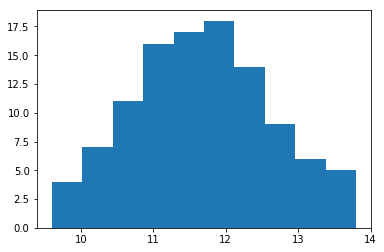

In [14]:
import matplotlib.pyplot as plt
plt.hist(temp)
plt.show()

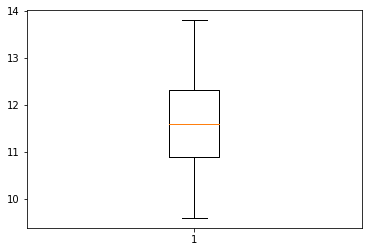

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(temp)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()

### 4. 데이터 정제하기
#### 1) 빈 값 채우기
#### 2) 빈 값 제거하기
#### 3) 이상값 제거하기
#### 4) 이상값 수정하기
#### 5) 데이터 범위 수정하기
##### 여기는 책 보고 내용 추가해야 함

In [ ]:
# 앞의 값으로 빈 값 채우기
df2 = df.fillna(method='bfill')

In [ ]:
# 뒤의 값으로 빈 값 채우기
df.fillna(method='ffill')

In [ ]:
# 빈 값 없애기
df2=  df.dropna()

In [ ]:
# 앞의 5개 데이터만 살펴보기
df2.head()

In [35]:
# 데이터 저장하기
import numpy as np
X = np.array(df['년'])
y = np.array(df['평균기온'])
type(X)

print(X.shape, y.shape)

(112,) (112,)


In [38]:
# 훈련셋, 테스트셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(84,) (28,) (84,) (28,)
(84, 1) (28, 1) (84,) (28,)


In [40]:
# 알고리즘 선택 - 모델 만들기
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [41]:
# 예측하기
y_pred = model.predict(X_test)
y_pred

array([12.09847963, 12.11799568, 12.13751173, 12.15702777, 12.17654382,
       12.19605987, 12.21557592, 12.23509196, 12.25460801, 12.27412406,
       12.29364011, 12.31315615, 12.3326722 , 12.35218825, 12.3717043 ,
       12.39122034, 12.41073639, 12.43025244, 12.44976849, 12.46928453,
       12.48880058, 12.50831663, 12.52783268, 12.54734872, 12.56686477,
       12.58638082, 12.60589686, 12.62541291])

In [42]:
# 차이 비교하기
print(np.mean(y_test-y_pred))

0.44519658465795786


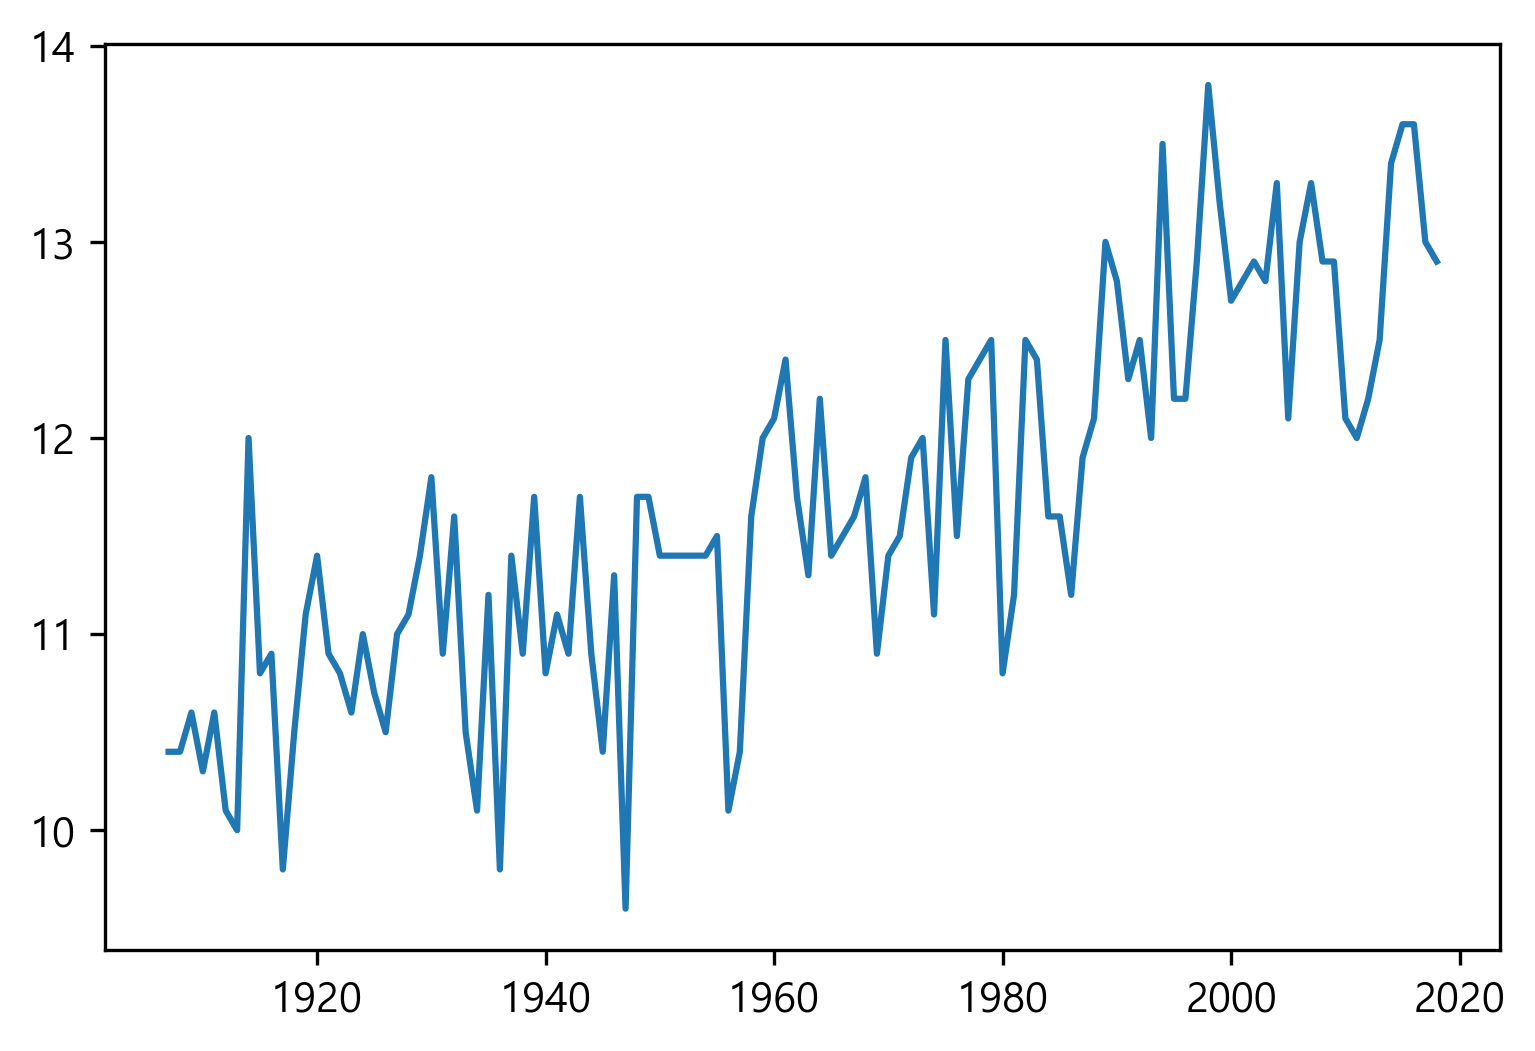

In [45]:
# 원본 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.plot(X, y)
plt.show()

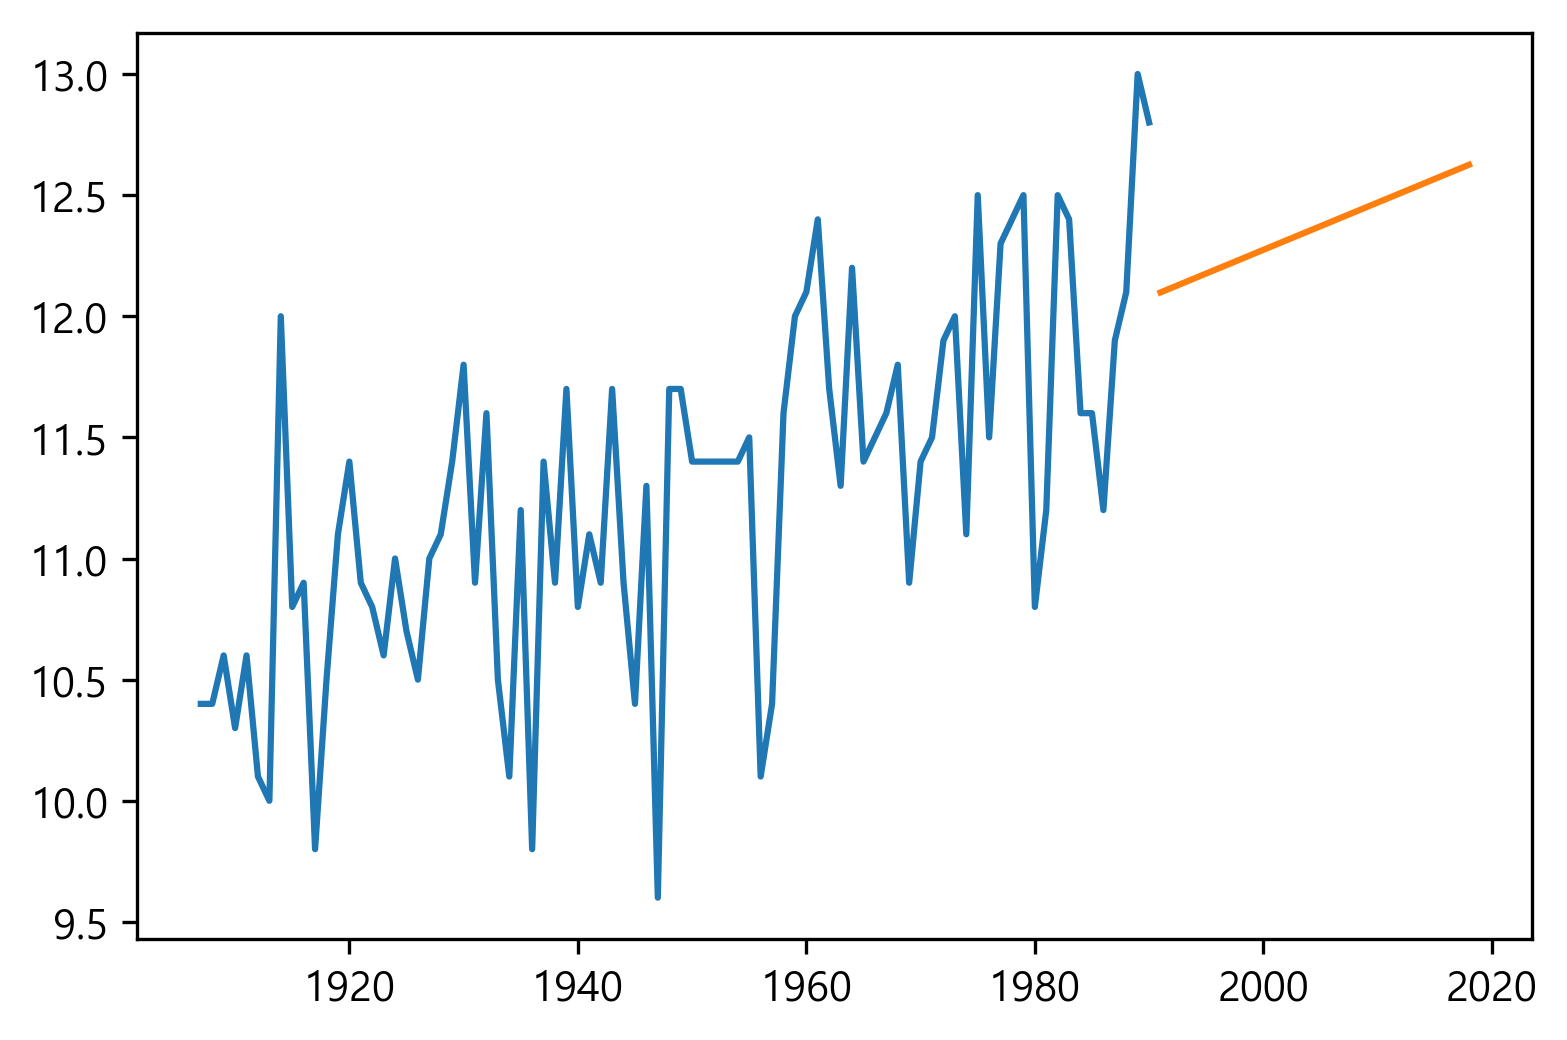

In [46]:
# 훈련 데이터셋과 테스트 데이터셋을 그래프로 그리기
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.plot(X_train,y_train)
plt.plot(X_test, y_pred)
plt.show()

In [56]:
# 모델로 데이터 만들기(용어 확인 필요)
new_X = np.arange(1907,2019)
new_X = np.reshape(new_X, (-1, 1))
new_Y = model.predict(new_X)

In [48]:
# 모델의 인자값 확인하기(용어 확인 필요)
print(model.coef_, model.intercept_)

[0.01951605] -26.757970706354833


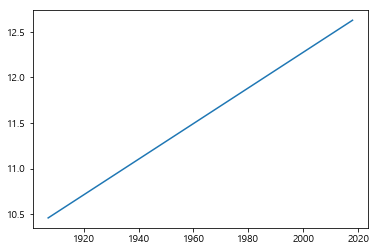

In [57]:
# 예측 모델 그리기
import matplotlib.pyplot as plt
plt.plot(new_X,new_Y)
plt.show()

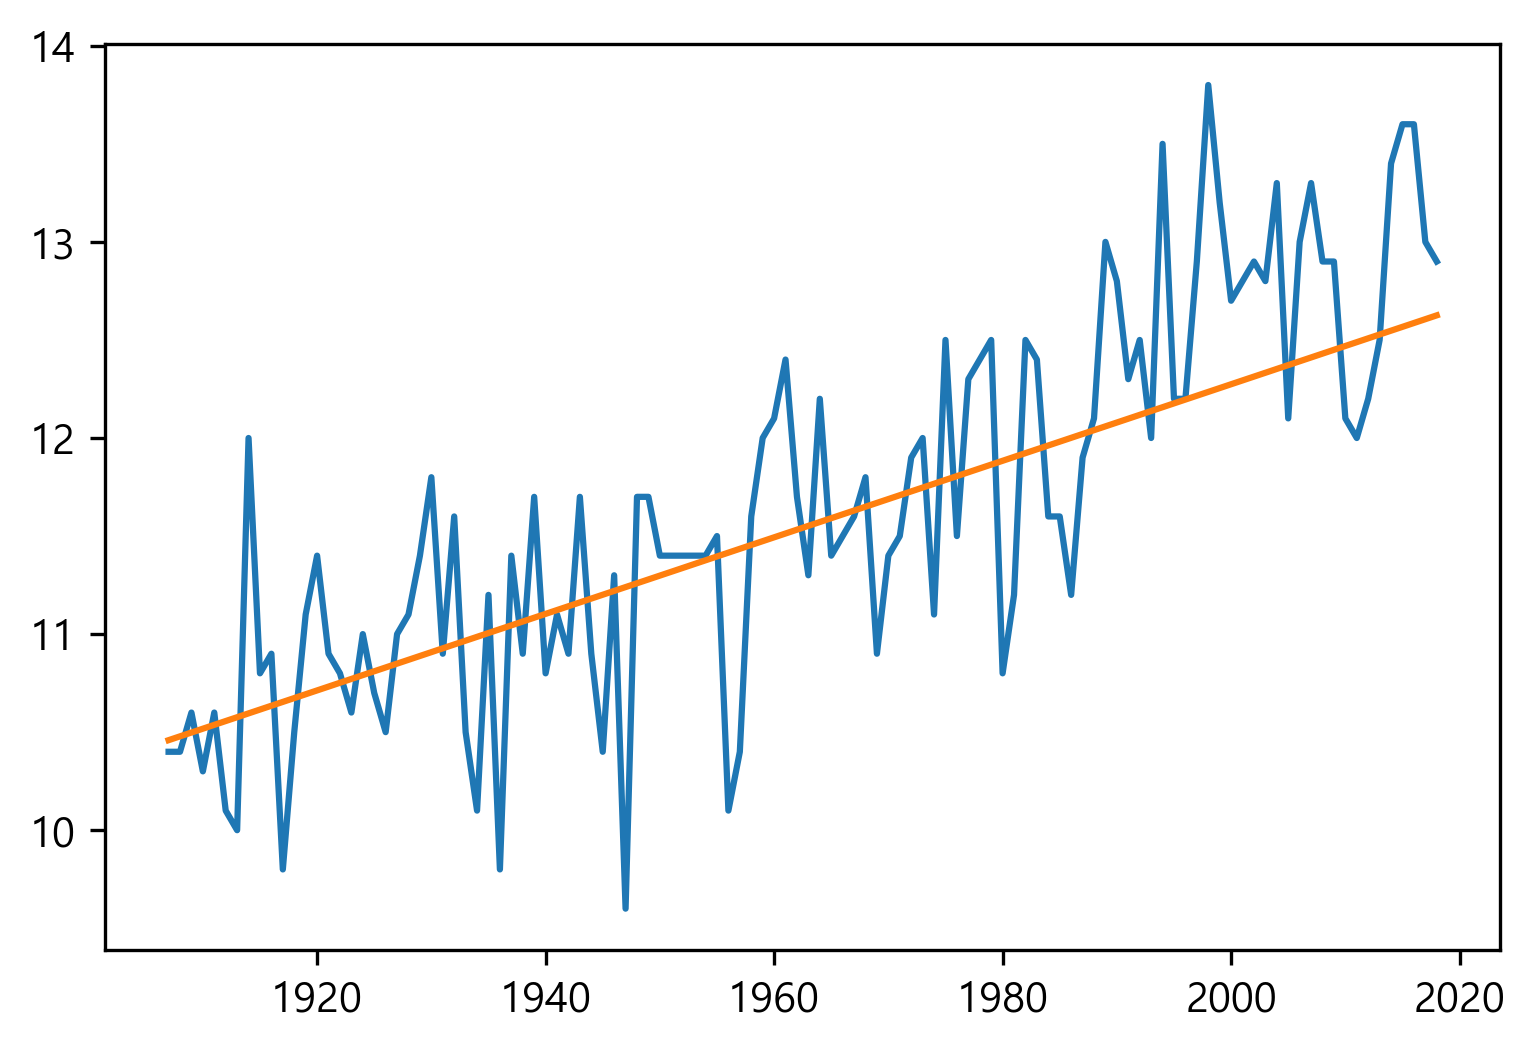

In [58]:
import matplotlib.pyplot as plt
plt.plot(X, y)
plt.plot(new_X,new_Y)
plt.show()

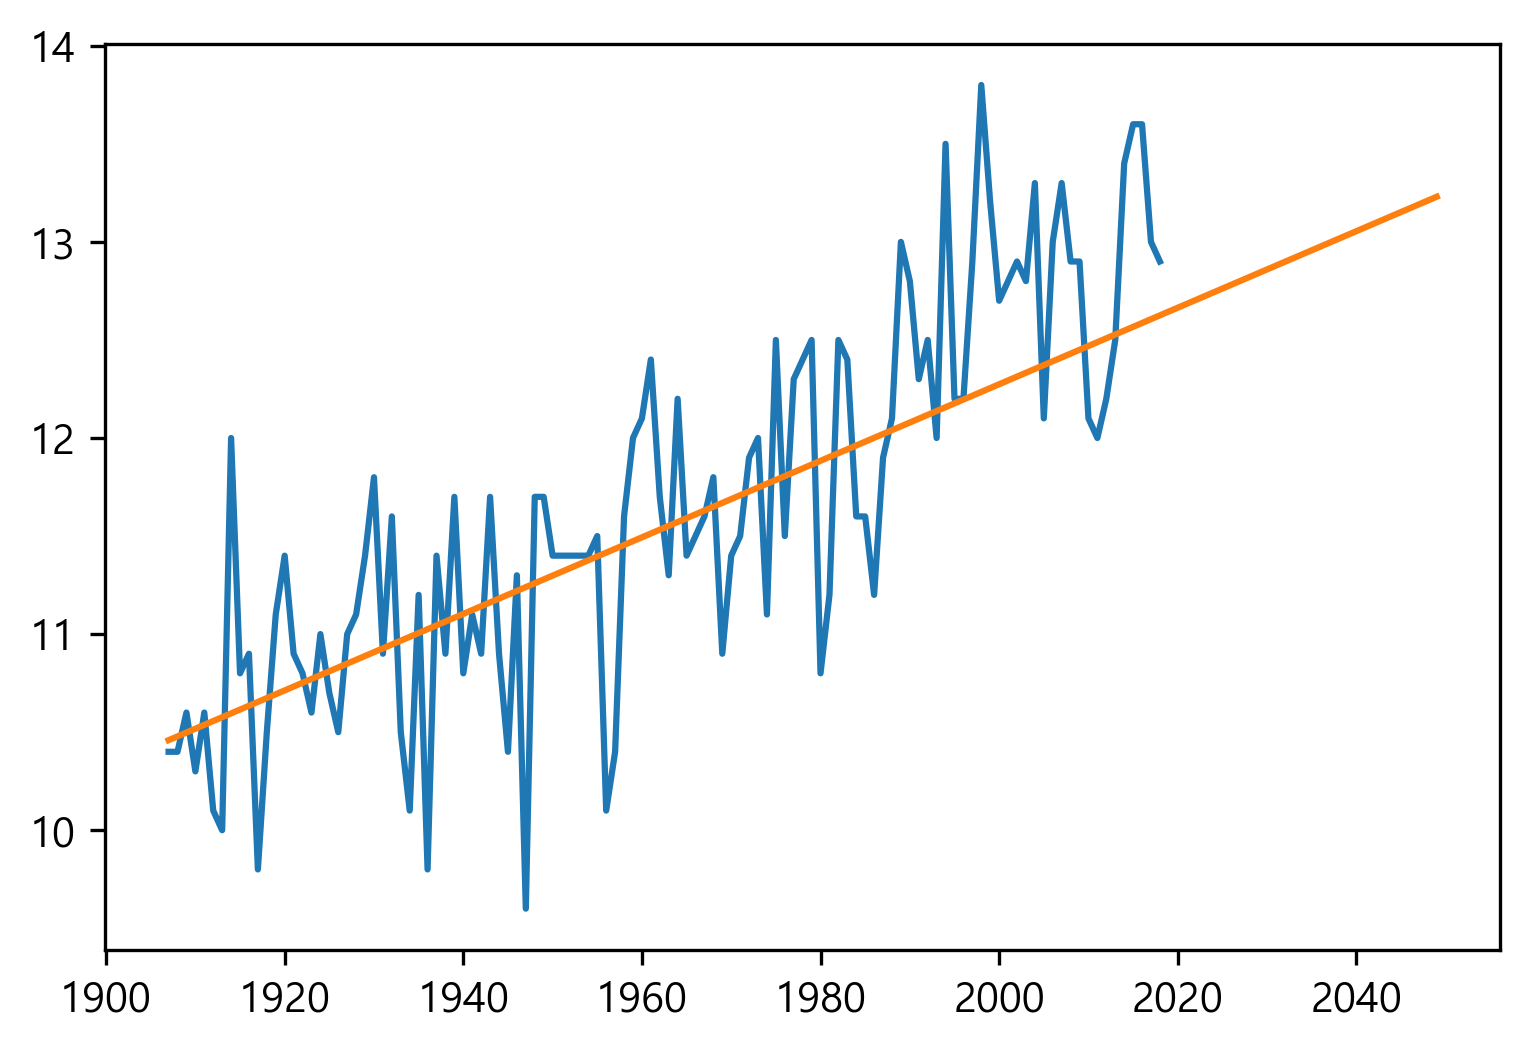

In [62]:
# 2050년까지 기온 예측하기
import matplotlib.pyplot as plt
plt.figure(dpi=300)
new_X = np.arange(1907,2050)
new_X = np.reshape(new_X, (-1, 1))
new_Y = model.predict(new_X)
plt.plot(X, y)
plt.plot(new_X,new_Y)
plt.show()

In [63]:
new_Y[-20:]

array([12.85960548, 12.87912153, 12.89863758, 12.91815362, 12.93766967,
       12.95718572, 12.97670177, 12.99621781, 13.01573386, 13.03524991,
       13.05476595, 13.074282  , 13.09379805, 13.1133141 , 13.13283014,
       13.15234619, 13.17186224, 13.19137829, 13.21089433, 13.23041038])